# Machine Learning

## Introducción a Redes Neuronales

### Librerias

In [1]:
#Evitar warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
#0 = all messages are logged (default behavior)
#1 = INFO messages are not printed
#2 = INFO and WARNING messages are not printed
#3 = INFO, WARNING, and ERROR messages are not printed

In [2]:
#Data Analysis
import pandas as pd

#Plotting
import matplotlib.pyplot as plt

#Neural Network Architecture
import tensorflow as tf

#Metrics
from sklearn.metrics import classification_report, confusion_matrix

#Utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### Carga de datos

Para conocer más sobre el dataset pueden ver los siguientes links:

* https://github.com/uci-ml-repo/ucimlrepo

* https://archive.ics.uci.edu/dataset/45/heart+disease

* https://pubmed.ncbi.nlm.nih.gov/2756873/

In [5]:
df = pd.read_csv('./Data/data.csv') #

In [6]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


### Análisis exploratorio

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [9]:
df[df.columns[:13]].describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


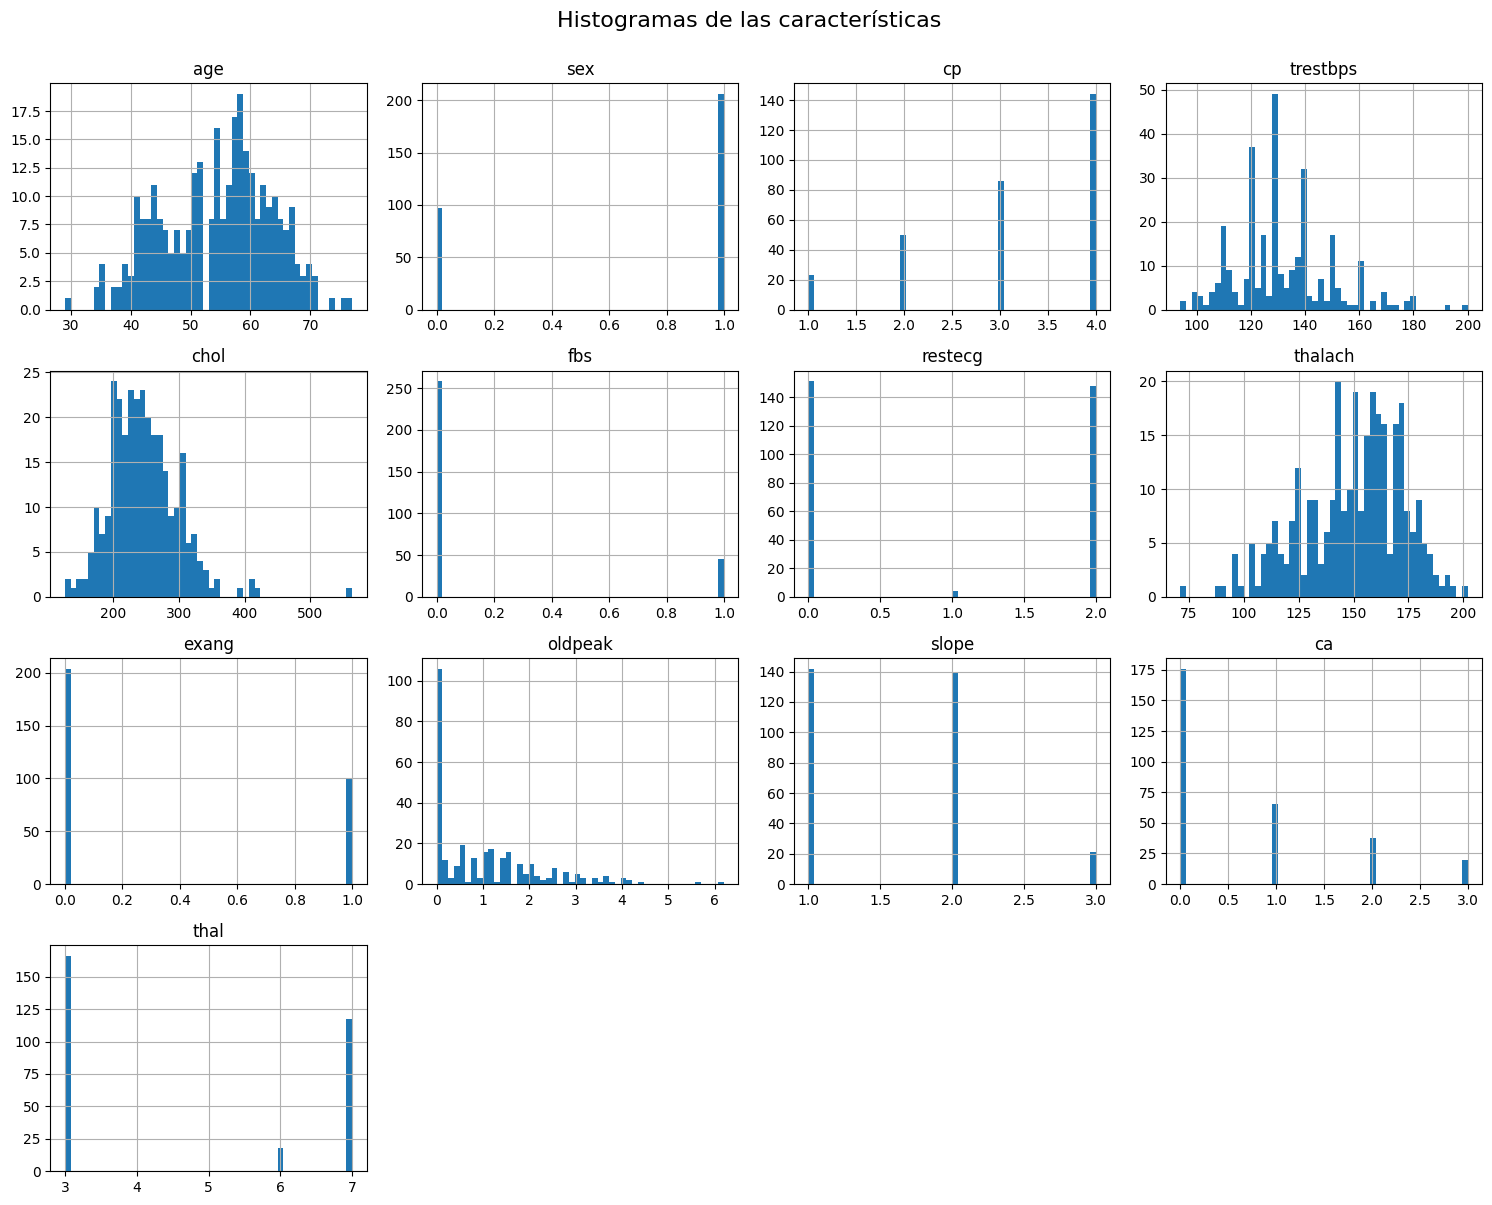

In [10]:
df[df.columns[:13]].hist(bins=50, figsize=(15, 12), layout=(4, 4))
plt.suptitle("Histogramas de las características", y=1, fontsize=16)
plt.tight_layout()
plt.show()

In [11]:
df['num'].value_counts()

num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

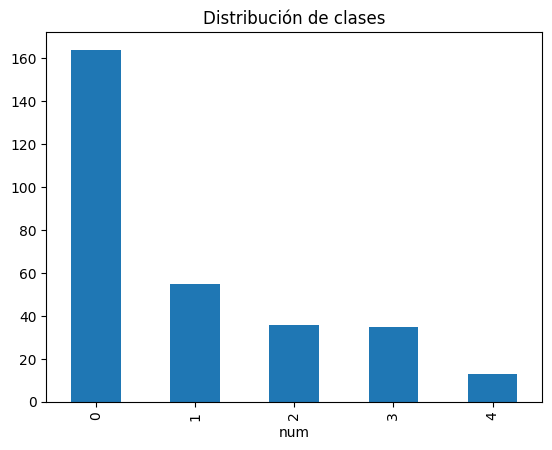

In [12]:
df['num'].value_counts().plot(kind='bar')
plt.title('Distribución de clases')
plt.show()

Transformaremos el problema en binario, considerando 0 como ausencia de enfermedad coronaria, y 1 como presencia de enfermedad. No solo para simplificar el problema (ya que es introductorio), sino para que las clases estén más balanceadas.

In [13]:
df_binary = df.copy()

In [14]:
df_binary['num'] = df_binary['num'].apply(lambda x: 1 if x>0 else 0)

In [15]:
df_binary['num'].value_counts() 

num
0    164
1    139
Name: count, dtype: int64

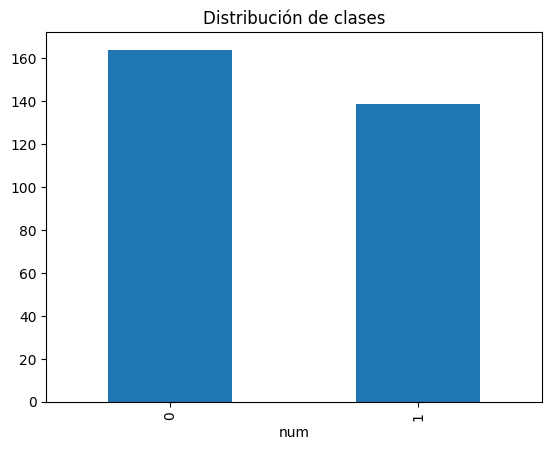

In [16]:
df_binary['num'].value_counts().plot(kind='bar')
plt.title('Distribución de clases')
plt.show()

Como podemos ver están mejor distribuidas.

Eliminaremos los registros con valores nulos ya que son muy pocos.

In [17]:
df_binary = df_binary.dropna()

In [18]:
X = df_binary[df_binary.columns[:13]]
Y = df_binary['num']

Separamos en conjunto de entrenamiento y prueba

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Arquitectura de la red Neuronal

In [20]:
# Escalado de datos
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
X_train.shape

(237, 13)

In [22]:
# Construcción del modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],), name='input_layer'),
    tf.keras.layers.Dense(32, activation='relu', name='hidden_layer_1'),
    tf.keras.layers.Dense(16, activation='relu', name='input_layer_2'),
    tf.keras.layers.Dense(1, activation='sigmoid', name='output_layer')
])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 16)                224       
                                                                 
 hidden_layer_1 (Dense)      (None, 32)                544       
                                                                 
 input_layer_2 (Dense)       (None, 16)                528       
                                                                 
 output_layer (Dense)        (None, 1)                 17        
                                                                 
Total params: 1313 (5.13 KB)
Trainable params: 1313 (5.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
# Compilación del modelo
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
            ])

In [25]:
# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=25, batch_size=1, validation_split=0.1, verbose=2)

Epoch 1/25


I0000 00:00:1704934485.111099  101028 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


213/213 - 2s - loss: 0.6949 - binary_accuracy: 0.4789 - val_loss: 0.7107 - val_binary_accuracy: 0.3333 - 2s/epoch - 9ms/step
Epoch 2/25
213/213 - 0s - loss: 0.6904 - binary_accuracy: 0.4977 - val_loss: 0.7082 - val_binary_accuracy: 0.3333 - 428ms/epoch - 2ms/step
Epoch 3/25
213/213 - 0s - loss: 0.6861 - binary_accuracy: 0.5211 - val_loss: 0.7061 - val_binary_accuracy: 0.2500 - 498ms/epoch - 2ms/step
Epoch 4/25
213/213 - 0s - loss: 0.6819 - binary_accuracy: 0.5258 - val_loss: 0.7038 - val_binary_accuracy: 0.2500 - 439ms/epoch - 2ms/step
Epoch 5/25
213/213 - 0s - loss: 0.6768 - binary_accuracy: 0.5258 - val_loss: 0.7017 - val_binary_accuracy: 0.2500 - 477ms/epoch - 2ms/step
Epoch 6/25
213/213 - 0s - loss: 0.6703 - binary_accuracy: 0.5728 - val_loss: 0.7011 - val_binary_accuracy: 0.3333 - 483ms/epoch - 2ms/step
Epoch 7/25
213/213 - 0s - loss: 0.6612 - binary_accuracy: 0.6150 - val_loss: 0.7021 - val_binary_accuracy: 0.3750 - 488ms/epoch - 2ms/step
Epoch 8/25
213/213 - 0s - loss: 0.6501 - 

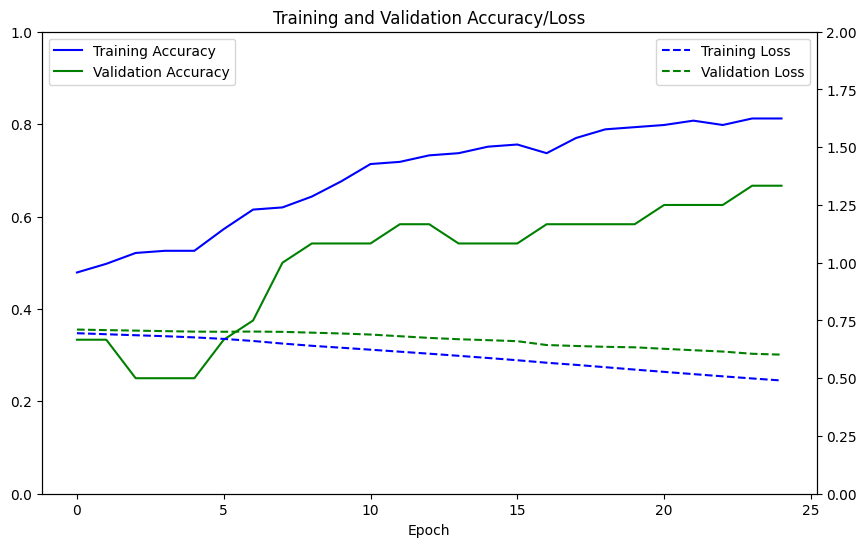

In [27]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting Accuracy on the primary y-axis
ax1.plot(history.history['binary_accuracy'], label='Training Accuracy', color='blue')
ax1.plot(history.history['val_binary_accuracy'], label='Validation Accuracy', color='green')
ax1.set_xlabel('Epoch')
ax1.set_ylim([0, 1])
ax1.legend(loc='upper left')

# Creating a secondary y-axis for Loss
ax2 = ax1.twinx()
ax2.plot(history.history['loss'], label='Training Loss', color='blue', linestyle='--')
ax2.plot(history.history['val_loss'], label='Validation Loss', color='green', linestyle='--')
ax2.set_ylim([0, 2])
ax2.legend(loc='upper right')

plt.title('Training and Validation Accuracy/Loss')
plt.show()


In [ ]:
# Evaluación del modelo en datos de prueba
eval_results = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest Loss: {eval_results[0]}, Test Accuracy: {eval_results[1]}")

In [28]:
# Predicción
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

2/2 [==============================] - 0s 2ms/step


In [29]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.83      0.88        36
           1       0.79      0.92      0.85        24

    accuracy                           0.87        60
   macro avg       0.86      0.88      0.86        60
weighted avg       0.88      0.87      0.87        60



In [30]:
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[30  6]
 [ 2 22]]


Ejercicios:

* Podemos ver que el modelo no clasifica correctamente. Aunque no lo hace tan mal, aceptarían este modelo? **Qué puede estar pasando si observan el gráfico de entrenamiento y validación?**

* Investigar sobre las funciones de activación (ReLU, Sigmoid, etc.). Conocer sus funcionalidades, fortalezas y debilidades. **Por qué las necesitamos en general?**

* Mejorar el modelo, si es posible. Explorar con diferentess optimizadores, batch sizes, capas, activaciones, etc. Manipular hiperparámetros para obtener mejores resultados. **Es necesario incluir todas las características en el modelo?**

* Por otro lado, la función **XOR** es linealmente separable?

Links de Referencia:

* Tensorflow Docs: https://www.tensorflow.org/

Links de interés:

* Neural Network PlayGround: https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.99698&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false